In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages",
                          file_name = "raw_dataset")

In [4]:
dataset

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [5]:
dataset.uns["metadata"]

Metadata(71 entries with factors ['organ', 'genotype', 'sex', 'experiment', 'age'])

In [6]:
dataset.uns["metadata"].to_df()

,sample_ID,file_name,organ,genotype,sex,experiment,age,staining
0,1,20112023_lineage_BM_Cre_neg_unstained_037.fcs,BM,neg,m,1,95,stained
1,2,20112023_lineage_BM_Cre_pos_unstained_036.fcs,BM,pos,m,1,95,stained
2,3,20112023_lineage_BM_M1_038.fcs,BM,pos,f,1,95,stained
3,4,20112023_lineage_BM_M2_039.fcs,BM,neg,f,1,95,stained
4,5,20112023_lineage_BM_M3_040.fcs,BM,pos,f,1,95,stained
...,...,...,...,...,...,...,...,...
66,67,22112023_lineage_SPL_M14_020.fcs,SPL,pos,m,3,96,stained
67,68,22112023_lineage_SPL_M15_021.fcs,SPL,pos,m,3,96,stained
68,69,22112023_lineage_SPL_M16_022.fcs,SPL,neg,f,3,96,stained
69,70,22112023_lineage_SPL_M17_023.fcs,SPL,neg,f,3,96,stained


In [7]:
dataset = dataset[~dataset.obs["sample_ID"].isin(["1", "2","9", "10", "16", "17", "24", "25",
                                                  "32", "33", "40", "41", "48", "49", "56",
                                                  "57", "64", "65"]),:].copy()
dataset

AnnData object with n_obs × n_vars = 20018950 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [8]:
fp.sync.synchronize_dataset(dataset)

['obs_names']
     ... updated metadata


In [9]:
dataset.uns["metadata"]

Metadata(53 entries with factors ['organ', 'genotype', 'sex', 'experiment', 'age'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


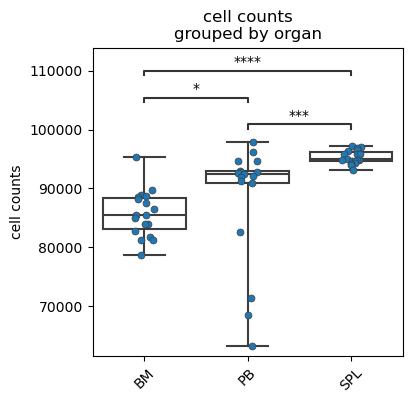

In [10]:
### first, we plot the cell counts
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


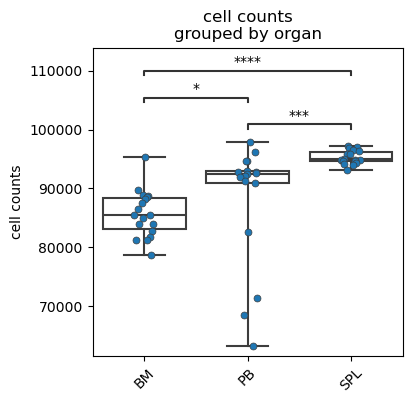

In [11]:
### we can also pass a complete gate in case of gate ambiguity errors
fp.pl.cell_counts(dataset,
                  gate = 'root/cells/singlets/live/CD45+',
                  groupby = "organ",
                  figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


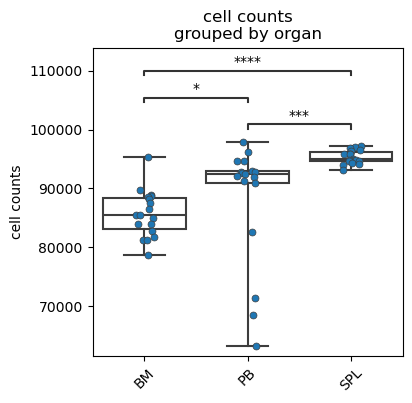

In [12]:
### we can also pass a partial gate in case of gate ambiguity errors
fp.pl.cell_counts(dataset,
                  gate = 'singlets/live/CD45+',
                  groupby = "organ",
                  figsize = (4,4))

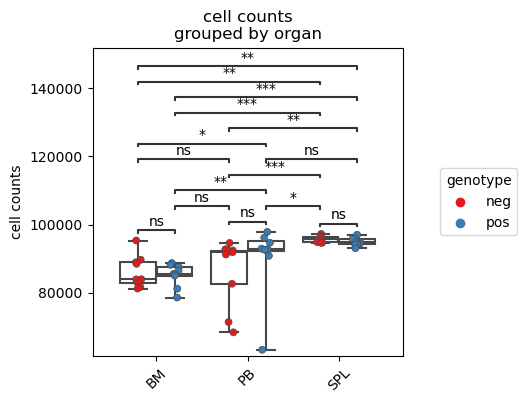

In [13]:
### if we are interested in one more dimension, we use the splitby parameter
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  splitby = "genotype", # use the splitby parameter to control splitting the x-axis
                  figsize = (4,4))

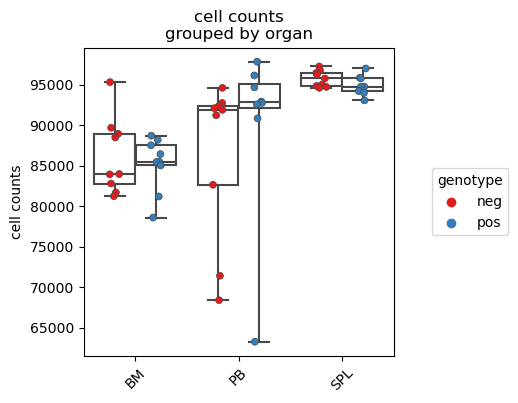

In [14]:
### we can remove the statistics
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  splitby = "genotype", # use the splitby parameter to control splitting the x-axis
                  stat_test = False, # we disable the stat testing for this plot
                  figsize = (4,4))

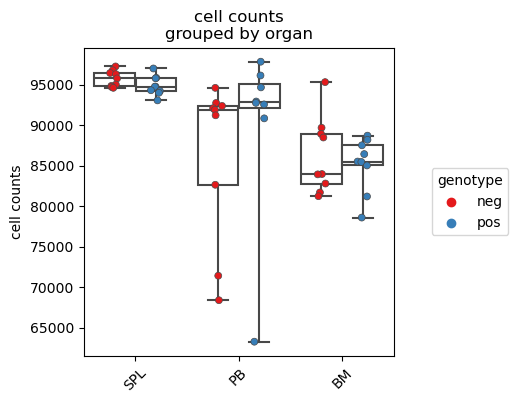

In [15]:
### to modify the order, we pass the order parameter
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  splitby = "genotype", # use the splitby parameter to control splitting the x-axis
                  stat_test = False, # we disable the stat testing for this plot
                  order = ["SPL", "PB", "BM"],
                  figsize = (4,4))

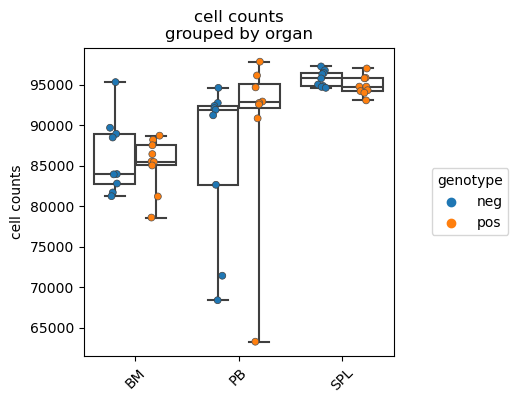

In [16]:
### coloring the data points is done via the cmap parameter
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  splitby = "genotype", # use the splitby parameter to control splitting the x-axis
                  stat_test = False, # we disable the stat testing for this plot
                  cmap = "tab10", # instead of the default Set1
                  figsize = (4,4))

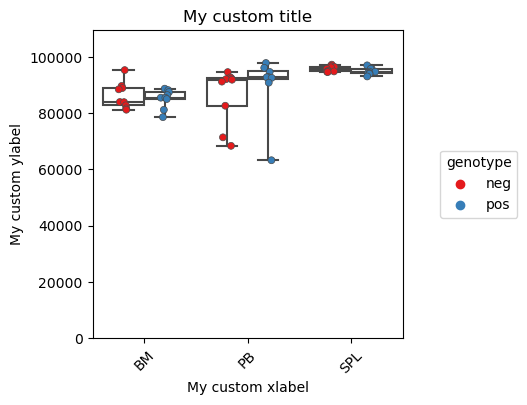

In [17]:
# if we want to modify the plot, we return the axis
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (4,4))
ax = fp.pl.cell_counts(dataset,
                       gate = "CD45+",
                       groupby = "organ",
                       splitby = "genotype",
                       stat_test = False,
                       show = False, #this disables the show method
                       ax = ax # this passes the current axis for plotting
                      )
ax.set_ylim(0, ax.get_ylim()[1]*1.1)
ax.set_title("My custom title")
ax.set_xlabel("My custom xlabel")
ax.set_ylabel("My custom ylabel")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


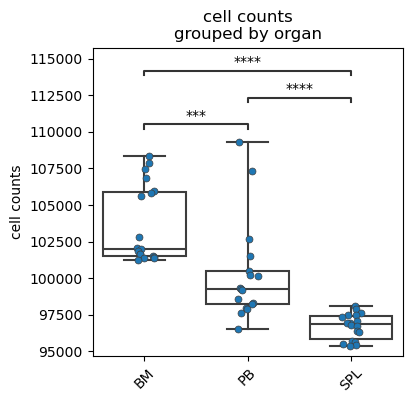

In [18]:
fp.pl.cell_counts(dataset,
                  gate = "live",
                  groupby = "organ",
                  figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


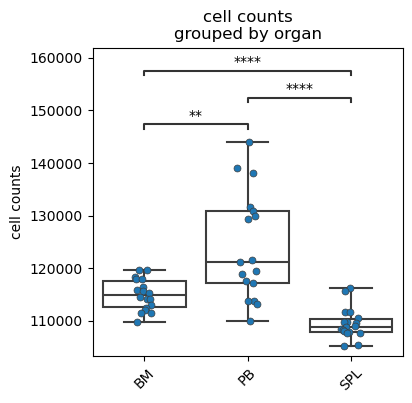

In [19]:
fp.pl.cell_counts(dataset,
                  gate = "singlets",
                  groupby = "organ",
                  figsize = (4,4))

In [20]:
### we calculate the gate frequencies
fp.tl.gate_frequencies(dataset)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


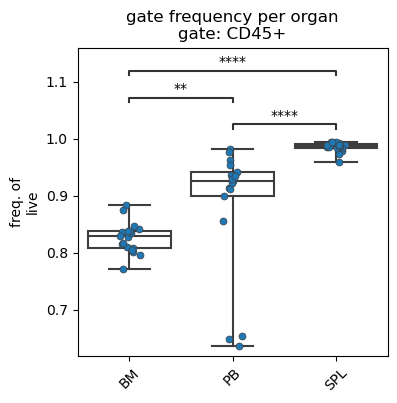

In [21]:
### for the freq_of parameter, valid inputs are 'parent', 'grandparent' or a gate
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     freq_of = "parent",
                     groupby = "organ",
                     figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


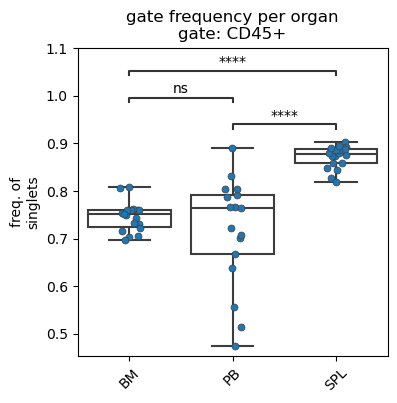

In [22]:
# here we display CD45+ cells as a frequency of singlets
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     freq_of = "grandparent",
                     groupby = "organ",
                     figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


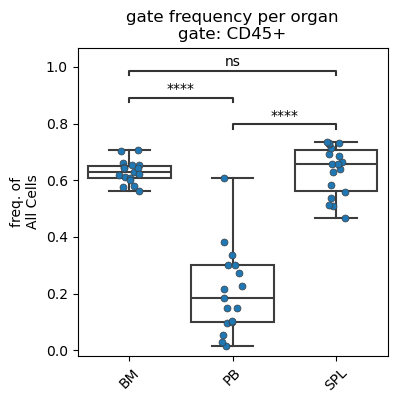

In [23]:
# here we display CD45+ as a percentage of all events
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     freq_of = "all",
                     groupby = "organ",
                     figsize = (4,4))

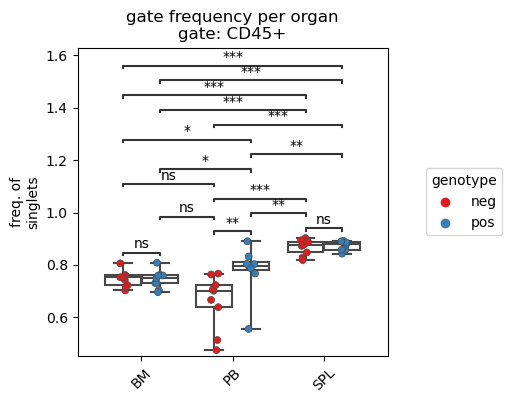

In [24]:
# similar to the cell_count plot, we can set the splitby parameter to visualize group-differences
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     splitby = "genotype",
                     freq_of = "singlets",
                     figsize = (4,4))

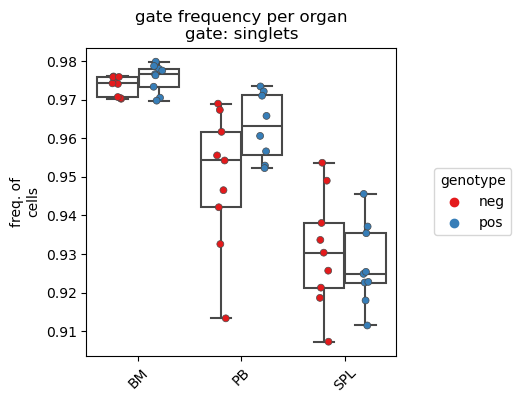

In [25]:
# we disable the statistical testing
fp.pl.gate_frequency(dataset,
                     gate = "singlets",
                     freq_of = "parent",
                     groupby = "organ",
                     splitby = "genotype",
                     stat_test = False,
                     figsize = (4,4))

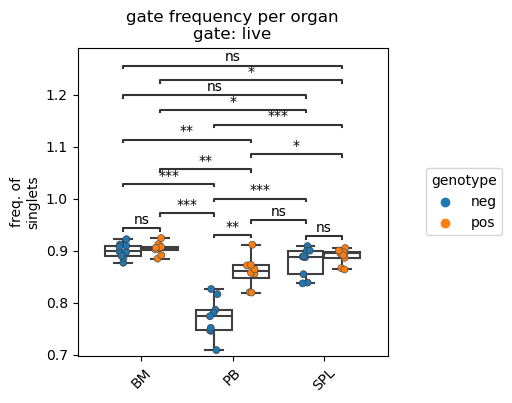

In [26]:
# the cmap parameter sets the coloring of the data points
fp.pl.gate_frequency(dataset,
                     gate = "live",
                     freq_of = "parent",
                     groupby = "organ",
                     splitby = "genotype",
                     cmap = "tab10",
                     figsize = (4,4))

In [27]:
dataset

AnnData object with n_obs × n_vars = 20018950 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'CD45+', 'root/cells/singlets/live/CD45+', 'singlets/live/CD45+', 'live', 'singlets'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [31]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages/",
                file_name = "raw_dataset_stained",
                overwrite = True)

File saved successfully


In [30]:
cols_to_drop = [col for col in dataset.obs.columns if "/" in col]
dataset.obs = dataset.obs.drop(cols_to_drop, axis = 1)